# Summary

Strategies with strong results:
  - Strategy 9: Multiple-Period Reversal Signal Traded Every Period

# Get Historical Data For Cryptocurrencies

In [1]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

# The universe is based on this snapshot from December 20, 2020: https://coinmarketcap.com/historical/20201220/

univ = [
    "BTCUSDT", "ETHUSDT", "ADAUSDT", "BNBUSDT", "XRPUSDT", "DOTUSDT", "MATICUSDT", "LTCUSDT", "BCHUSDT",
    "LINKUSDT", "XLMUSDT", "USDCUSDT", "EOSUSDT", "TRXUSDT", "XTZUSDT", "FILUSDT", "NEOUSDT", "DAIUSDT",
    "DASHUSDT", "VETUSDT", "ATOMUSDT", "AAVEUSDT", "UNIUSDT", "GRTUSDT", "THETAUSDT", "IOTAUSDT", "BUSDUSDT",
    "ZECUSDT", "YFIUSDT", "ETCUSDT", "WAVESUSDT", "COMPUSDT", "SNXUSDT", "DOGEUSDT", "MKRUSDT", "ZILUSDT",
    "SUSHIUSDT", "KSMUSDT", "OMGUSDT", "ONTUSDT", "ALGOUSDT", "EGLDUSDT", "BATUSDT", "DGBUSDT", "ZRXUSDT",
    "TUSDUSDT", "QTUMUSDT", "ICXUSDT", "AVAXUSDT", "RENUSDT", "HBARUSDT", "NEARUSDT", "LRCUSDT", "CELOUSDT",
    "KNCUSDT", "LSKUSDT", "OCEANUSDT", "QNTUSDT", "USTUSDT", "BANDUSDT", "MANAUSDT", "ENJUSDT", "ANTUSDT",
    "BNTUSDT", "ZENUSDT", "NMRUSDT", "RVNUSDT", "IOSTUSDT", "OXTUSDT", "CRVUSDT", "MATICUSDT", "HNTUSDT",
    "BALUSDT", "CHZUSDT"
]

should_download_stock_data = False

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
client = bnb_client(tld='US')


def get_binance_px(symbol, freq, start_ts = '2020-12-20'):
    data = client.get_historical_klines(symbol, freq, start_ts)
    columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_volume',
               'num_trades', 'taker_base_volume', 'taker_quote_volume', 'ignore']
    data = pd.DataFrame(data, columns = columns)
    
    # Convert from POSIX timestamp (number of millisecond since jan 1, 1970)
    data['open_time'] = data['open_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    data['close_time'] = data['close_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    return data 


if should_download_stock_data:
    freq = '4h'
    px = {}
    for x in univ:
        print(f"Downloading data for symbol {x}")
        data = get_binance_px(x, freq)
        px[x] = data.set_index('open_time')['close']

    px = pd.DataFrame(px).astype(float)
    px.to_csv('./class_project_input_prices.csv')
else:
    px = pd.read_csv('./class_project_input_prices.csv')
    date_format = "%Y-%m-%d %H:%M:%S"
    px['open_time'] = px['open_time'].apply(lambda t:  datetime.strptime(t, date_format))
    px.set_index('open_time', inplace=True)

px

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
open_time,,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,23353.97,646.62,0.16284,32.9681,0.56944,NaN,NaN,117.34,313.46,NaN,...,NaN,12.056,NaN,NaN,NaN,0.2492,NaN,1.41095,NaN,NaN
2020-12-20 04:00:00,23604.24,655.23,0.16638,33.6559,0.57916,NaN,NaN,121.30,340.00,NaN,...,NaN,12.107,NaN,NaN,NaN,0.2477,NaN,1.43156,NaN,NaN
2020-12-20 08:00:00,23549.50,652.88,0.16463,34.8228,0.57948,NaN,NaN,118.09,349.70,NaN,...,NaN,12.237,NaN,NaN,NaN,0.2477,NaN,1.44273,NaN,NaN
2020-12-20 12:00:00,23880.85,653.24,0.16542,35.0120,0.57798,NaN,NaN,119.10,361.21,NaN,...,NaN,12.074,NaN,NaN,NaN,0.2533,NaN,1.47130,NaN,NaN
2020-12-20 16:00:00,23932.71,649.82,0.16502,34.7042,0.57306,NaN,NaN,116.60,357.09,NaN,...,NaN,12.008,NaN,NaN,NaN,0.2503,NaN,1.43083,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,108921.64,4352.10,0.81950,856.7600,2.80720,3.816,NaN,110.23,542.00,23.36,...,0.725,7.240,16.62,0.01323,0.00342,0.0535,0.7646,NaN,NaN,0.03830
2025-08-30 20:00:00,108569.75,4374.56,0.82170,862.6200,2.81940,3.773,NaN,110.77,552.90,23.47,...,0.725,7.240,15.16,0.01323,0.00342,0.0535,0.7646,NaN,NaN,0.03830
2025-08-31 00:00:00,109155.73,4486.79,0.83590,863.4900,2.85180,3.867,NaN,111.67,551.30,23.90,...,0.764,7.240,15.21,0.01353,0.00342,0.0535,0.7936,NaN,NaN,0.04045


In [94]:
import numpy as np
import statsmodels.api as sm

from datetime import timedelta
from scipy.stats.mstats import winsorize


bitcoin_benchmark_returns = px['BTCUSDT'] / px['BTCUSDT'].shift() - 1


def get_rank_demeaned_normalized_signal(raw_signal):
    signal_rank = raw_signal.rank(axis=1)
    signal_mean = raw_signal.rank(axis=1).mean(axis=1)
    demeaned_signal = signal_rank.subtract(signal_mean, axis=0)
    return demeaned_signal.divide(demeaned_signal.abs().sum(axis=1), axis=0)


def get_gross_returns_and_net_returns(signal_weights, px):
    asset_returns = px / px.shift() - 1
    weighted_returns = signal_weights.shift() * asset_returns
    gross_returns = weighted_returns.sum(axis=1)
    turnover = (signal_weights.fillna(0) - signal_weights.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20 # (commission + slippage)
    net_returns = gross_returns.subtract(turnover * tcost_bps * 1e-4, fill_value = 0)
    return gross_returns, net_returns


def get_max_drawdown(net_returns):
    cumulative_net_returns = net_returns.cumsum()
    drawdowns = cumulative_net_returns / cumulative_net_returns.expanding(min_periods=1).max() - 1
    return drawdowns[drawdowns != float('-inf')].min()


def get_max_drawdown_duration(net_returns, hours_freq):
    cumulative_net_returns = net_returns.cumsum()
    
    peak = cumulative_net_returns.expanding(min_periods=1).max()
    
    max_drawdown_duration = 0
    current_drawdown_duration = 0
    
    for dt in cumulative_net_returns.index:
        if cumulative_net_returns[dt] >= peak[dt]:
            current_drawdown_duration = 0
        else:
            current_drawdown_duration += 1
            max_drawdown_duration = max(max_drawdown_duration, current_drawdown_duration)
    return max_drawdown_duration * hours_freq / 24


# returns pair in the form of (alpha, beta)
def get_alpha_beta_to_asset(net_returns, benchmark_asset_returns):
    model = sm.OLS(net_returns, sm.add_constant(benchmark_asset_returns))
    res = model.fit()
    return res.params[0], res.params[1]


def get_bitcoin_returns_over_period(input_prices, trade_hours_freq = 4):
    date_times = []
    current_date_time = input_prices.index[0]
    while current_date_time <= input_prices.index[-1]:
        if current_date_time in input_prices.index:
            date_times.append(current_date_time)
        current_date_time += timedelta(hours=trade_hours_freq)
    btc_prices_at_interval = input_prices['BTCUSDT'].loc[date_times]
    return btc_prices_at_interval / btc_prices_at_interval.shift() - 1


def get_winsorized_signal(raw_signal, proportion_lo, proportion_hi):
    winsorized_signal = raw_signal.apply(lambda row: winsorize(
        row, limits=[proportion_lo, proportion_hi]), axis=1, result_type='expand')
    winsorized_signal.columns = raw_signal.columns
    return winsorized_signal


# trade_hours_freq = 4, 8, 12, 24 (for 1 day), ...
def get_strategy_stats(net_returns, trade_hours_freq, input_prices):
    alpha, beta = get_alpha_beta_to_asset(net_returns.iloc[2:],
                                          get_bitcoin_returns_over_period(
                                              input_prices, trade_hours_freq).iloc[2:])
    res = {
        "avg returns": net_returns.mean() * 24 / trade_hours_freq * 365,
        "volatility": net_returns.std() * np.sqrt(24 / trade_hours_freq * 365),
        "sharpe ratio": net_returns.mean() / net_returns.std() * np.sqrt(24 / trade_hours_freq * 365),
        "max drawdown": get_max_drawdown(net_returns),
        "max drawdown duration": get_max_drawdown_duration(net_returns, trade_hours_freq),
        "alpha_BTC": alpha,
        "beta_BTC": beta,
    }
    return res

# Strategy 1: Simple One-Period (4h) Reversal Signal 

In [4]:
ret = px / px.shift() - 1
simple_raw_reversal_signal = ret * -1
simple_raw_reversal_signal

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
open_time,,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-20 04:00:00,-0.010716,-0.013315,-0.021739,-0.020863,-0.017069,NaN,NaN,-0.033748,-0.084668,NaN,...,NaN,-0.004230,NaN,NaN,NaN,0.006019,NaN,-0.014607,NaN,NaN
2020-12-20 08:00:00,0.002319,0.003587,0.010518,-0.034671,-0.000553,NaN,NaN,0.026463,-0.028529,NaN,...,NaN,-0.010738,NaN,NaN,NaN,-0.000000,NaN,-0.007803,NaN,NaN
2020-12-20 12:00:00,-0.014070,-0.000551,-0.004799,-0.005433,0.002589,NaN,NaN,-0.008553,-0.032914,NaN,...,NaN,0.013320,NaN,NaN,NaN,-0.022608,NaN,-0.019803,NaN,NaN
2020-12-20 16:00:00,-0.002172,0.005235,0.002418,0.008791,0.008512,NaN,NaN,0.020991,0.011406,NaN,...,NaN,0.005466,NaN,NaN,NaN,0.011844,NaN,0.027506,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,-0.000563,0.005439,0.003769,0.002863,0.000178,-0.007924,NaN,0.003526,0.005505,0.002136,...,0.069320,-0.000000,-0.003623,-0.000000,-0.0,-0.000000,-0.000000,NaN,NaN,-0.000000
2025-08-30 20:00:00,0.003231,-0.005161,-0.002685,-0.006840,-0.004346,0.011268,NaN,-0.004899,-0.020111,-0.004709,...,-0.000000,-0.000000,0.087846,-0.000000,-0.0,-0.000000,-0.000000,NaN,NaN,-0.000000
2025-08-31 00:00:00,-0.005397,-0.025655,-0.017281,-0.001009,-0.011492,-0.024914,NaN,-0.008125,0.002894,-0.018321,...,-0.053793,-0.000000,-0.003298,-0.022676,-0.0,-0.000000,-0.037928,NaN,NaN,-0.056136


<Axes: xlabel='open_time'>

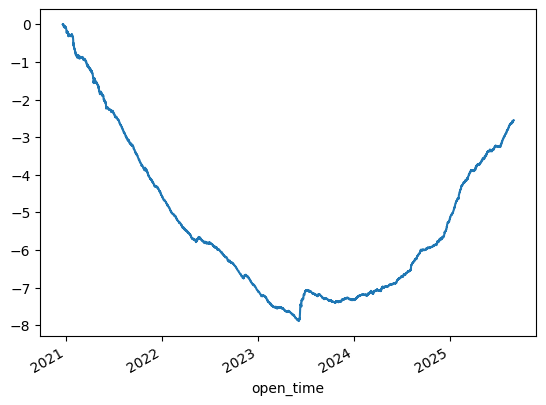

In [5]:
transformed_signal = get_rank_demeaned_normalized_signal(simple_raw_reversal_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns.cumsum().plot()

<Axes: xlabel='open_time'>

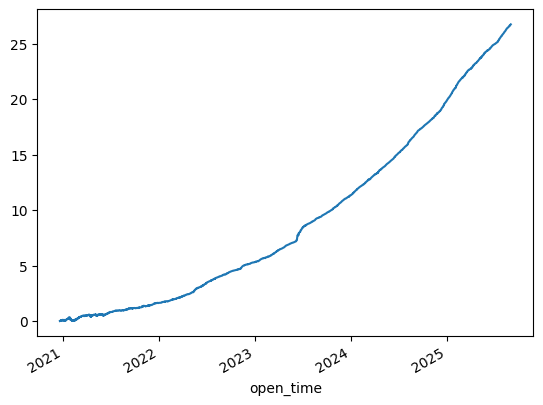

In [6]:
gross_returns.cumsum().plot()

In [7]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1100/3733429805.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -0.5417910961191515,
 'volatility': 0.2637606139161894,
 'sharpe ratio': -2.0541015888418697,
 'max drawdown': -2252.7514939157913,
 'max drawdown duration': 1713.0,
 'alpha_BTC': -0.00025204855897909575,
 'beta_BTC': 0.020664750027787882}

# Strategy 2: Winsorize Simple One-Period (4h) Reversal Signal

In [107]:
ret = px / px.shift() - 1
raw_signal = ret * -1

### With limits of 10% on each side

In [108]:
winsorized_signal_10 = get_winsorized_signal(raw_signal, 0.1, 0.1)
winsorized_signal_10

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,LTCUSDT,BCHUSDT,LINKUSDT,...,BNTUSDT,ZENUSDT,NMRUSDT,RVNUSDT,IOSTUSDT,OXTUSDT,CRVUSDT,HNTUSDT,BALUSDT,CHZUSDT
open_time,,,,,,,,,,,,,,,,,,,,,
2020-12-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-20 04:00:00,-0.010716,-0.013315,-0.020863,-0.020863,-0.017069,NaN,NaN,-0.020863,-0.020863,NaN,...,NaN,-0.004230,NaN,NaN,NaN,0.006019,NaN,-0.014607,NaN,NaN
2020-12-20 08:00:00,0.002319,0.003587,0.010518,-0.007803,-0.000553,NaN,NaN,0.026463,-0.007803,NaN,...,NaN,-0.007803,NaN,NaN,NaN,-0.000000,NaN,-0.007803,NaN,NaN
2020-12-20 12:00:00,-0.014070,-0.000551,-0.004799,-0.005433,0.002589,NaN,NaN,-0.008553,-0.014172,NaN,...,NaN,0.013320,NaN,NaN,NaN,-0.014172,NaN,-0.014172,NaN,NaN
2020-12-20 16:00:00,0.003950,0.005235,0.003950,0.008791,0.008512,NaN,NaN,0.020991,0.011406,NaN,...,NaN,0.005466,NaN,NaN,NaN,0.011844,NaN,0.027506,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-30 16:00:00,-0.000563,0.005439,0.003769,0.002863,0.000178,-0.003310,NaN,0.003526,0.005505,0.002136,...,0.069320,-0.000000,-0.003310,-0.000000,-0.0,-0.000000,-0.000000,NaN,NaN,-0.000000
2025-08-30 20:00:00,0.003231,-0.005161,-0.002685,-0.006840,-0.004346,0.011268,NaN,-0.004899,-0.010767,-0.004709,...,-0.000000,-0.000000,0.087846,-0.000000,-0.0,-0.000000,-0.000000,NaN,NaN,-0.000000
2025-08-31 00:00:00,-0.005397,-0.025655,-0.017281,-0.001009,-0.011492,-0.024914,NaN,-0.008125,0.002894,-0.018321,...,-0.045067,-0.000000,-0.003298,-0.022676,-0.0,-0.000000,-0.037928,NaN,NaN,-0.045067


<Axes: >

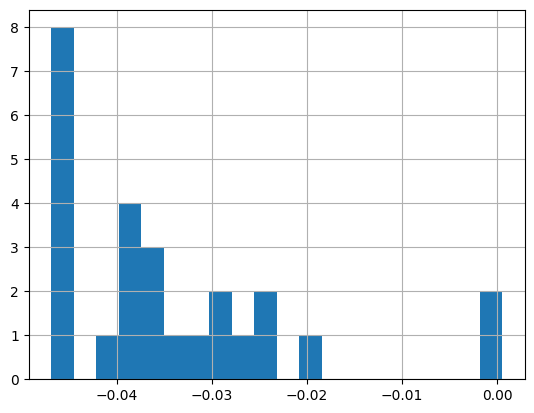

In [101]:
winsorized_signal_10.iloc[200].hist(bins=20)

In [103]:
transformed_signal = get_rank_demeaned_normalized_signal(winsorized_signal_10)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00    0.005209
2020-12-20 12:00:00   -0.004331
2020-12-20 16:00:00   -0.000546
                         ...   
2025-08-30 16:00:00    0.002794
2025-08-30 20:00:00    0.001231
2025-08-31 00:00:00    0.001694
2025-08-31 04:00:00    0.001376
2025-08-31 08:00:00   -0.004966
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

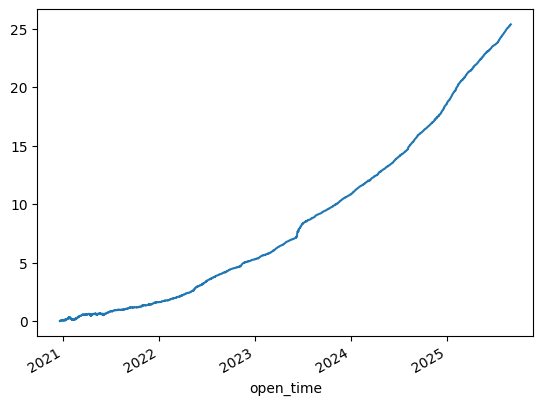

In [104]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

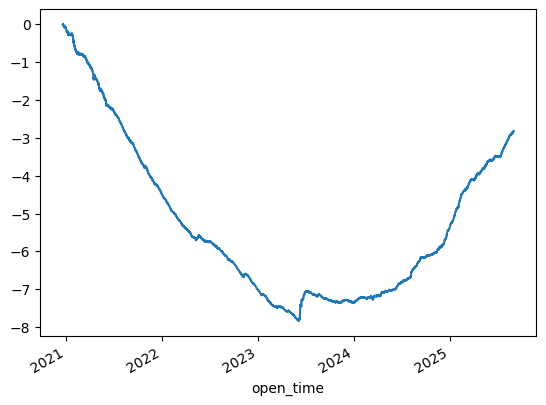

In [105]:
net_returns.cumsum().plot()

In [106]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1100/3955471873.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -0.5991416410969319,
 'volatility': 0.25168019337552155,
 'sharpe ratio': -2.3805673106861356,
 'max drawdown': -1872.3806295420725,
 'max drawdown duration': 1713.0,
 'alpha_BTC': -0.00027389326097429316,
 'beta_BTC': 0.0019530313411737629}

### With limits of 20% on each side

In [110]:
winsorized_signal_20 = get_winsorized_signal(raw_signal, 0.2, 0.2)

<Axes: >

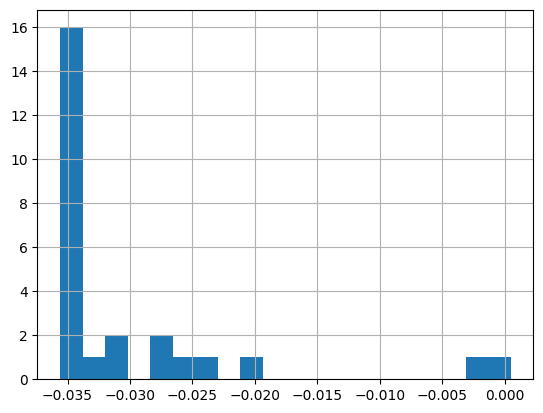

In [111]:
winsorized_signal_20.iloc[200].hist(bins=20)

In [112]:
transformed_signal = get_rank_demeaned_normalized_signal(winsorized_signal_20)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00   -0.002000
2020-12-20 08:00:00    0.005012
2020-12-20 12:00:00   -0.003288
2020-12-20 16:00:00   -0.000033
                         ...   
2025-08-30 16:00:00    0.002715
2025-08-30 20:00:00   -0.000254
2025-08-31 00:00:00   -0.003713
2025-08-31 04:00:00    0.002308
2025-08-31 08:00:00   -0.002980
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

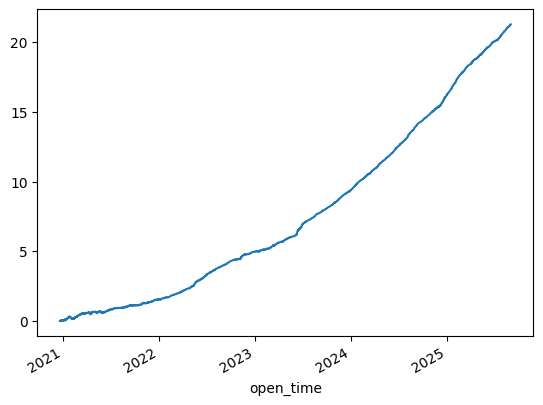

In [113]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

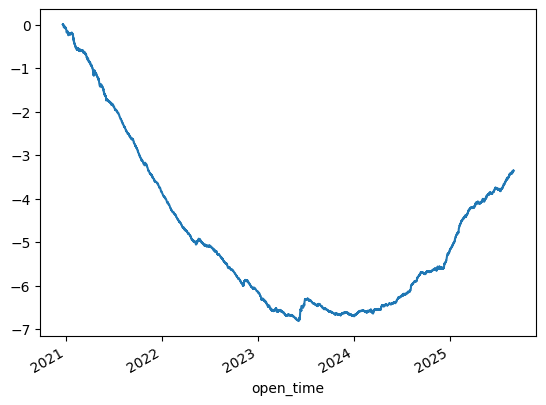

In [114]:
net_returns.cumsum().plot()

In [115]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1100/3955471873.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': -0.7135629472369659,
 'volatility': 0.22185812381942818,
 'sharpe ratio': -3.2163029910851475,
 'max drawdown': -1291.186159727889,
 'max drawdown duration': 1714.1666666666667,
 'alpha_BTC': -0.0003130456320925331,
 'beta_BTC': -0.05444637446100382}

# Strategy 3: Truncate Simple One-Period (4h) Reversal Signal

# Strategy 4: Rank-Threshold Simple One-Period (4h) Reversal Signal

# Strategy 5: Inverse CDF Of Simple One-Period (4h) Reversal Signal

# Strategy 6: One-Period (4h) Reversal Signal Traded Less Frequently Than One Period

# Strategy 7: Multiple-Period Reversal Signal Traded Less Frequently Than One Period

# Strategy 8: Use Raw One-Period (4h) Reversal Signal (Don't Rank)

# Strategy 9: Multiple-Period Reversal Signal Traded Every Period

### Price Change Over 8 Hours

In [13]:
ret = px / px.shift(2) - 1
raw_signal = -1 * ret
transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00    0.000000
2020-12-20 08:00:00   -0.002000
2020-12-20 12:00:00   -0.006960
2020-12-20 16:00:00   -0.001425
                         ...   
2025-08-30 16:00:00    0.004055
2025-08-30 20:00:00    0.001682
2025-08-31 00:00:00    0.000036
2025-08-31 04:00:00    0.001867
2025-08-31 08:00:00   -0.002286
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

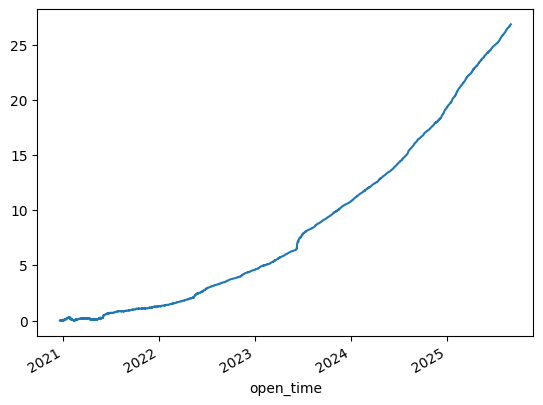

In [14]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

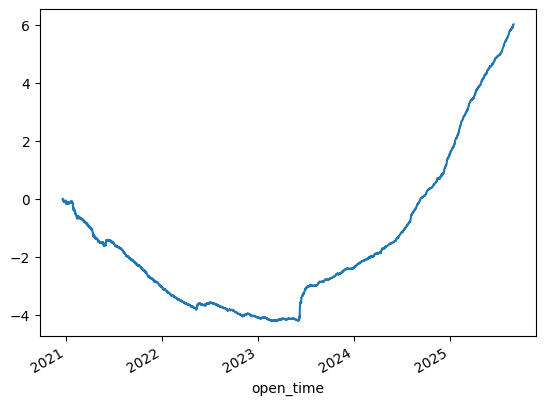

In [15]:
net_returns.cumsum().plot()

In [16]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1162/3733429805.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 1.2846476576733588,
 'volatility': 0.29705483855829473,
 'sharpe ratio': 4.324614485016229,
 'max drawdown': -0.20614532393703922,
 'max drawdown duration': 1360.5,
 'alpha_BTC': 0.0005799394808280853,
 'beta_BTC': 0.029142933797301936}

### Price Change Over 12 Hours

In [17]:
ret = px / px.shift(3) - 1
raw_signal = -1 * ret
transformed_signal = get_rank_demeaned_normalized_signal(raw_signal)
gross_returns, net_returns = get_gross_returns_and_net_returns(transformed_signal, px)
net_returns

open_time
2020-12-20 00:00:00    0.000000
2020-12-20 04:00:00    0.000000
2020-12-20 08:00:00    0.000000
2020-12-20 12:00:00   -0.002000
2020-12-20 16:00:00    0.000650
                         ...   
2025-08-30 16:00:00    0.006626
2025-08-30 20:00:00    0.001749
2025-08-31 00:00:00    0.003672
2025-08-31 04:00:00    0.003141
2025-08-31 08:00:00   -0.000958
Length: 10291, dtype: float64

<Axes: xlabel='open_time'>

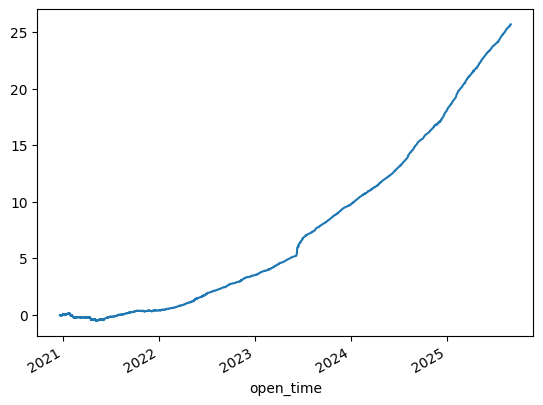

In [18]:
gross_returns.cumsum().plot()

<Axes: xlabel='open_time'>

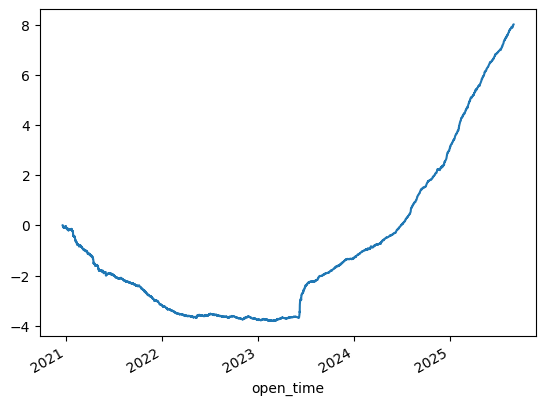

In [19]:
net_returns.cumsum().plot()

In [20]:
get_strategy_stats(net_returns, 4, px)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1162/3733429805.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return res.params[0], res.params[1]


{'avg returns': 1.7050576785936598,
 'volatility': 0.29861784738459457,
 'sharpe ratio': 5.709831791794043,
 'max drawdown': -0.5941779594602531,
 'max drawdown duration': 1285.8333333333333,
 'alpha_BTC': 0.0007740314842111819,
 'beta_BTC': 0.02016271520285459}

# Strategy 10: Multiple-Period Reversal Signal Traded Less Frequently Than One Period